<a href="https://colab.research.google.com/github/Nazaruk-Anton/Image_Classification_with_Pre-trained_Models/blob/main/1_Loading_%26_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Data

In [28]:
# get the data
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip

--2023-07-02 10:16:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245259777 (234M) [application/zip]
Saving to: ‘concrete_crack_images_for_classification.zip.2’

concrete_crack_imag 100%[===================>] 233.90M  34.2MB/s    in 6.7s    

2023-07-02 10:16:14 (34.9 MB/s) - ‘concrete_crack_images_for_classification.zip.2’ saved [245259777/245259777]



In [ ]:
!unzip concrete_crack_images_for_classification.zip


## Import Libraries and Packages

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.preprocessing.image import ImageDataGenerator
from PIL import Image




## Load Images

In [31]:
# Load a single image from the 'Negative' folder

negative_files = os.scandir('./Negative')
negative_files

In [32]:
file_name = next(negative_files)
file_name

<DirEntry '04503.jpg'>

In [33]:
os.path.isfile(file_name)

True

In [34]:
image_name = str(file_name).split("'")[1]
image_name

'04503.jpg'

In [ ]:
image_data = plt.imread('./Negative/{}'.format(image_name))
image_data

In [36]:
# Print the shape (dimensions) of the image and display it

print(image_data.shape)
print(
    "Image dimensions are {} pixels by {} pixels.".format(
        image_data.shape[0], image_data.shape[1]
    )
)

(227, 227, 3)
Image dimensions are 227 pixels by 227 pixels.


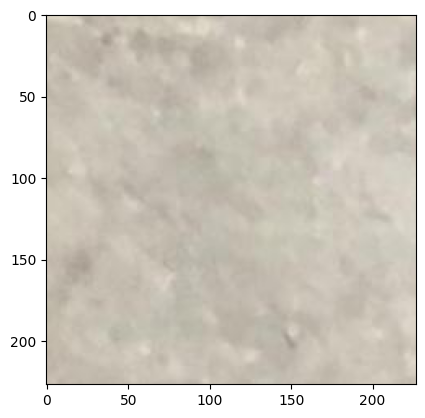

In [37]:
plt.imshow(image_data)

In [ ]:
# Load and display an image using PIL library

negative_images = os.listdir('./Negative')
negative_images

In [ ]:
negative_images.sort()
negative_images

In [40]:
image_data = Image.open('./Negative/{}'.format(negative_images[0]))

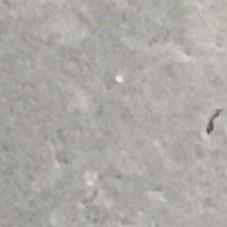

In [41]:
image_data

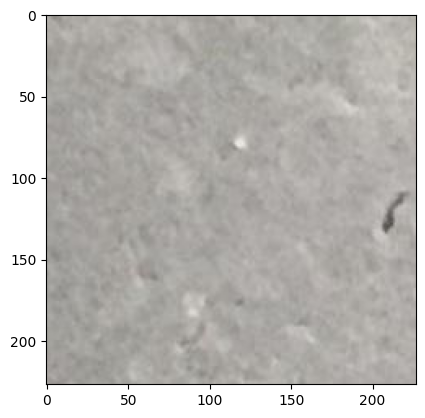

In [42]:
plt.imshow(image_data)

In [ ]:
# Create a list of file paths for the negative images

negative_images_dir = ['./Negative/{}'.format(image) for image in negative_images]
negative_images_dir

In [44]:
# Print the number of negative images and display the first four images

len(negative_images_dir)

20000

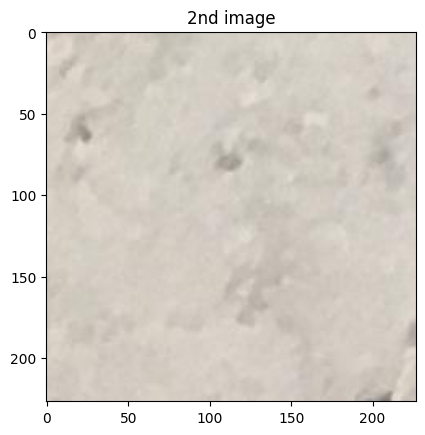

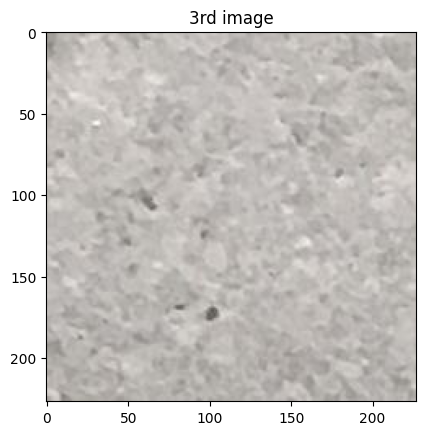

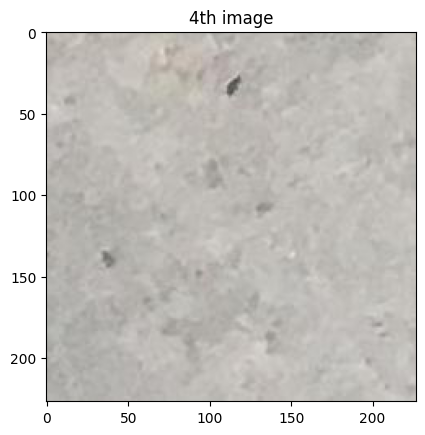

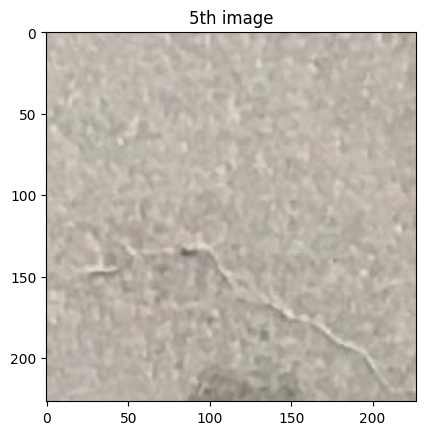

In [45]:
for i in range(1, 5):
    plt.imshow(Image.open(negative_images_dir[i]))
    plt.title("{} image".format(["2nd", "3rd", "4th", "5th"][i - 1]))
    plt.show()

In [ ]:
# Create a list of file paths for the positive images

positive_images_dir = ["./Positive/{}".format(filename) for filename in os.listdir("./Positive")]
positive_images_dir.sort()
positive_images_dir

In [47]:
# Print the number of positive images and display the first four images

print("There are {} images of cracked concrete.".format(len(positive_images_dir)))

There are 20000 images of cracked concrete.


Cracked concrete:


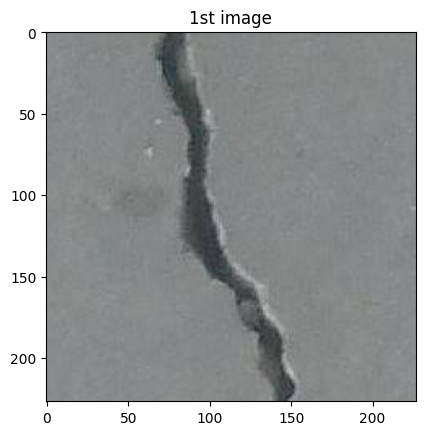

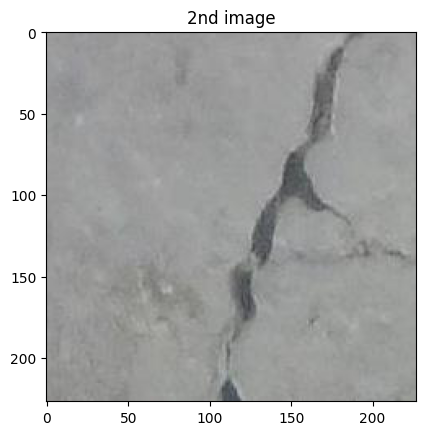

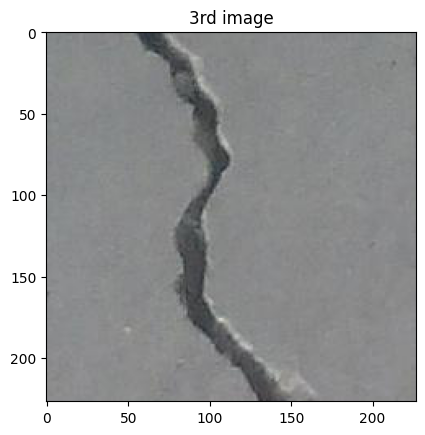

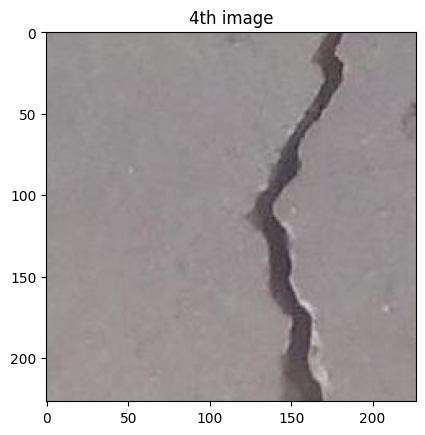

In [48]:
print("Cracked concrete:")
for i in range(4):
    plt.imshow(Image.open(positive_images_dir[i]))
    plt.title("{} image".format(["1st", "2nd", "3rd", "4th"][i]))
    plt.show()

## Construct an ImageDataGenerator Instance

In [51]:
dataset_dir = '/content/dataset'

In [53]:
# Create an image generator using ImageDataGenerator

data_generator = ImageDataGenerator()
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


In [ ]:
# Get the first batch of images and labels

first_batch = image_generator.next()
first_batch

In [ ]:
first_batch_images = image_generator.next()[0]
first_batch_images

In [56]:
first_batch_labels = image_generator.next()[1]
first_batch_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

#### Custom ImageDataGenerator


In [57]:
# Create an image generator with rescaling

data_generator = ImageDataGenerator(
    rescale=1./255
)

In [58]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


In [ ]:
first_batch = image_generator.next()
first_batch

## Visualize Batches of Images


In [60]:
# Get batches of images and labels

first_batch = image_generator.next()
first_batch_images = first_batch[0]
first_batch_labels = first_batch[1]
second_batch = image_generator.next()
second_batch_images = second_batch[0]
second_batch_labels = second_batch[1]
third_batch = image_generator.next()
third_batch_images = third_batch[0]
third_batch_labels = third_batch[1]
fourth_batch = image_generator.next()
fourth_batch_images = fourth_batch[0]
fourth_batch_labels = fourth_batch[1]
fifth_batch = image_generator.next()
fifth_batch_images = fifth_batch[0]
fifth_batch_labels = fifth_batch[1]

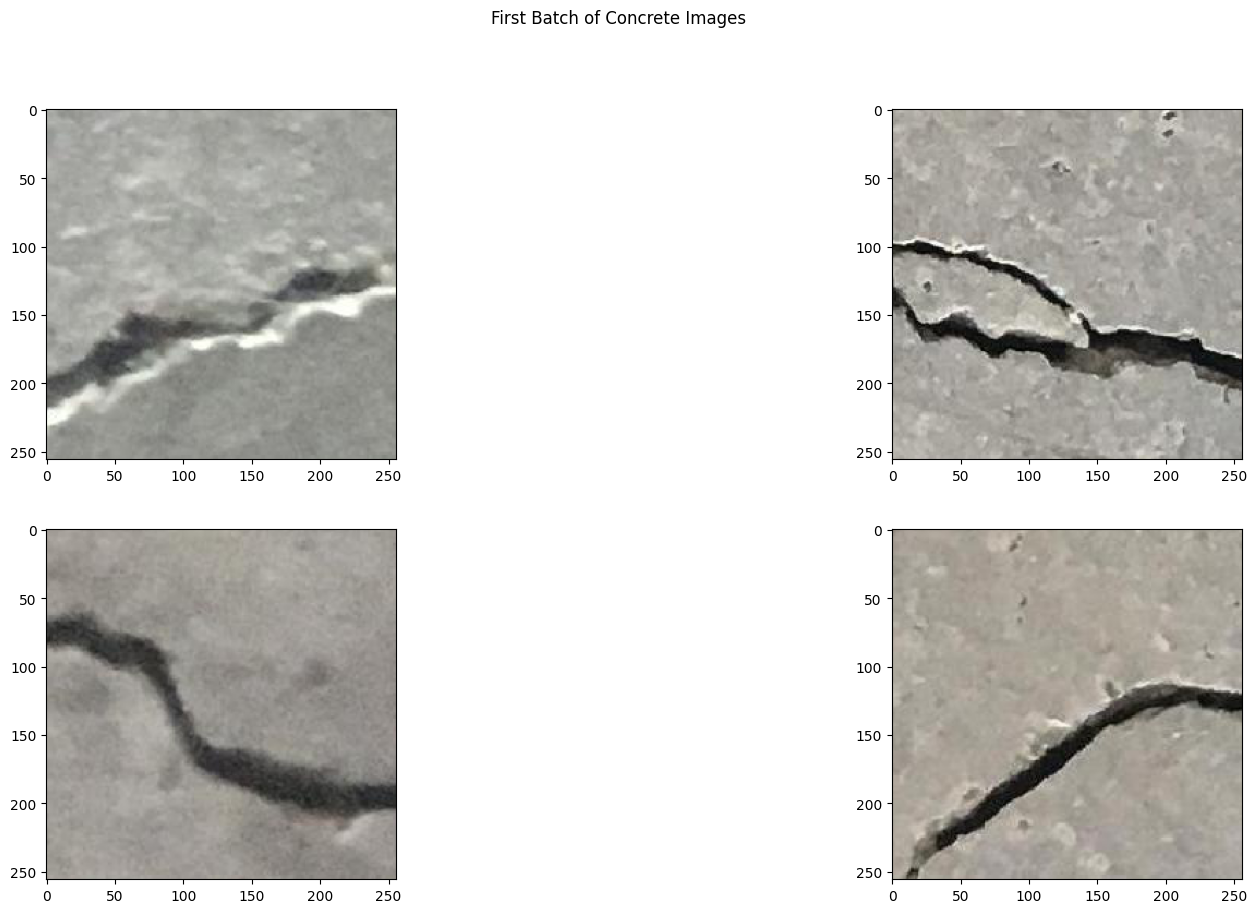

In [61]:
# Visualize the first batch of images

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images')
plt.show()

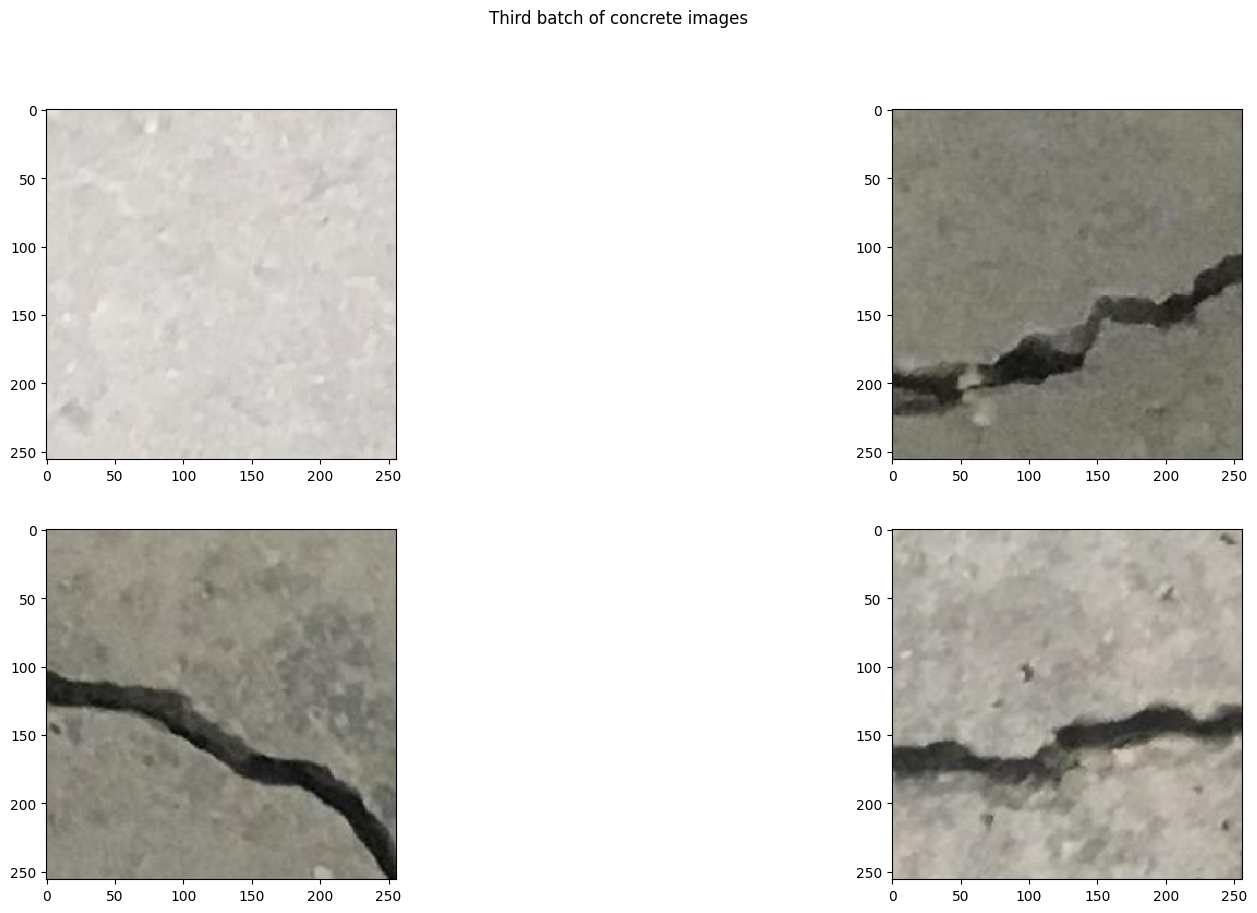

In [62]:
# Define a function to visualize batches of images

def visualize_batch(images, ordinal):
    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

    i = 0
    for axis1 in axes:
        for axis2 in axis1:
            image_data = images[i]
            axis2.imshow(image_data)
            i += 1

    figure.suptitle("{} batch of concrete images".format(ordinal.title()))
    plt.show()

# Visualize the third batch of images
visualize_batch(third_batch_images, "third")

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


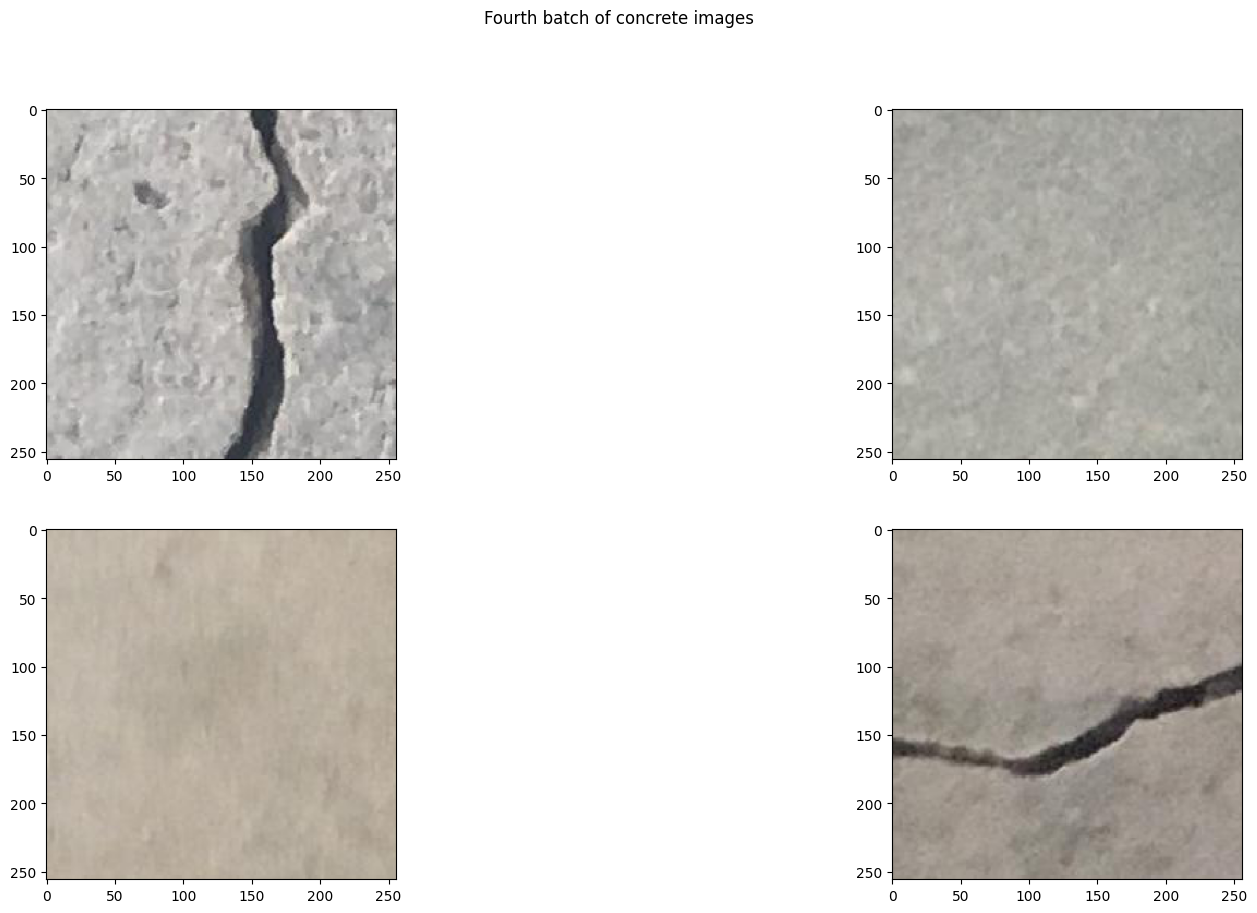

There are 1 negative image and 3 positive images.


In [63]:
print(fourth_batch_labels)
visualize_batch(fourth_batch_images, "fourth")
print("There are 1 negative image and 3 positive images.")

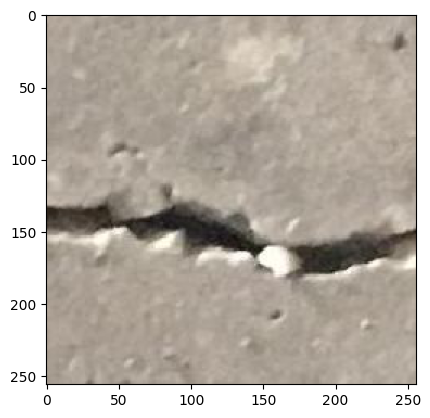

In [64]:
plt.imshow(fifth_batch_images[1])

In [65]:
print(fifth_batch_labels)
print("There are 2 negative images and 2 positive images.")

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
There are 2 negative images and 2 positive images.
